***
# **<center>Exercices#7</center>**
# ***<center>Pandas</center>***
***

***
<u>Exercice 1: </u> *Coeur.*   

  
1 - Charger les données à partir du fichier 'fichier_exercices_enonces/7_pandas/heart.csv'  et explorer son format et son contenu.   
Ce dataset contient des informations médicales sur des patients dans le but de prévoir s'ils souffrent de maladies cardiaques d'après un certain nombre de critères.  
| Paramètres          |      Détail            | Correspondance               |
|---------------------|-----------------------|------------------------------|
| age                 | Âge                   |    en années                          |
| sex                 | Sexe                  | 1 = homme 0 = femme          |
| cp                  | Type de douleur à la poitrine | 0: asymptomatic  1: atypical angina 2: non-anginal pain 3: typical angina       |
| trestbps            | Pression artérielle au repos (mm Hg à l'admission à l'hôpital) | mm Hg|
| chol                | Taux de cholestérol (mg/dl) |   mg/dl                          |
| fbs                 | Glycémie à jeun (> 120 mg/dl, 1 = vrai; 0 = faux) | 0 = non, 1 = oui     |
| restecg             | Résultats de l'électrocardiogramme au repos |  0: showing probable or definite left ventricular hypertrophy by Estes’ criteria 1: normal 2: having ST-T wave abnormality                 |
| thalach             | Fréquence cardiaque maximale atteinte |                       |
| exang               | Angine induite par l'exercice (1 = oui; 0 = non) | 0 = non, 1 = oui     |
| oldpeak             | Dépression du segment ST induite par l'exercice par rapport au repos | |
| slope               | Pente du segment ST à l'exercice de pointe | 0: descente 1: plat 2: montee                  |
| ca                  | Nombre de vaisseaux principaux (0-3) |                        |
| thal                | Thalassémie (trouble sanguin) |    NULL :dropped from the dataset previously 1: défaut irreversible 2: normal 3: defaut reversible)                            |
| target              | Maladie cardiaque (1 = non, 0 = oui) |                           |

https://archive.ics.uci.edu/dataset/45/heart+disease  

2- Verifier les données manquantes  
3- Afficher les lignes correspondant aux hommes ayant un taux de colesterol superieur à 240  
4- Trier les patients par âge croissant  

 ***<center>SOLUTION</center>***

1 - Charger les données à partir du fichier fichiers_exercices_enonces/heart.csv et explorer son format et son contenu.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('fichier_exercices_enonces/7_pandas/heart.csv')

Afficher un aperçu des premières lignes du DataFrame

In [ ]:
df.head()

In [ ]:
df.shape

On peut aller voir d'autres lignes avec iloc 

In [ ]:
df.iloc[5:20]

Demandons les dimensions du tableau (nombre de lignes et de colonnes)

In [ ]:
df.shape

Le nom des colonnes

In [ ]:
df.columns.values 

Pour obtenir une vision plus complete du jeu de données, demandons des statistiques sur les valeurs

In [ ]:
df.describe()

In [ ]:
df.info() 

2- Verifier si il y a des données manquantes

In [ ]:
# Compter les valeurs manquantes par colonne
missing_values = df.isnull().sum()

# Afficher le nombre de valeurs manquantes par colonne
print(missing_values)

Pas de valeurs manquantes

3- Afficher les lignes correspondant aux hommes ayant un taux de cholesterol superieur à 240

In [ ]:
print(df.shape)
df_condition1 = df.query("sex == 1  & chol > 240")
print(df_condition1.shape)
df_condition1

In [ ]:
df_condition1.describe()

4- Trier les patients par âge croissant 

In [ ]:
df_sorted = df.sort_values('age')
df_sorted

***
<u>Exercice 2: </u> *Coeur.*
  
1- Afficher l'histogramme des repartitions par age.   
2- Afficher l'ensemble des histogrammes. Quelques remarques? Regarder par exemple la répartition homme/femme.    
3- Afficher l'ensemble des boxplot.   
4- Représenter les correlation entre les paramètres d'abord avec une matrice puis avec des graphiques. Observer les corélations.   

 ***<center>SOLUTION</center>***

1- Afficher l'histogramme des repartitions par age.

In [ ]:
import matplotlib.pyplot as plt

# Créer la figure et les axes
fig, ax = plt.subplots()

# Tracer l'histogramme
ax.hist(df['age'], bins=30)

# Ajouter des labels aux axes
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

# Afficher la figure
plt.show()


2- Afficher l'ensemble des histogrammes. Quelques remarques? Regarder par exemple la répartition homme/femme.

In [ ]:
df.hist(bins=30, figsize=(10,15))
plt.show()

La répartition homme/femme n'est pas équilibrée.

3- Afficher l'ensemble des boxplot.

In [ ]:

# Créer la figure et les sous-graphiques
fig, axes = plt.subplots(5, 3, figsize=(12, 12))
# Boucle pour tracer les boîtes à moustaches de chaque colonne
for i, column in enumerate(df.columns):
    # Calcul des indices de la position du sous-graphique
    row = i // 3
    col = i % 3 
    # Tracer la boîte à moustaches de la colonne sur le sous-graphique correspondant
    axes[row, col].boxplot(df[column])
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Value')
    axes[row, col].set_title('Boxplot of ' + column)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


4- Représenter les correlation entre les paramètres d'abord avec une matrice puis avec des graphiques. Observer les corélations. 

In [ ]:
import seaborn as sns
# Calculer la matrice de corrélation
corr_matrix = df.corr()
print(corr_matrix)

In [ ]:

# Créer une figure et un axe pour le tracé
fig, ax = plt.subplots(figsize=(10, 8))

# Tracer la matrice de corrélation avec heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)

# Configurer les étiquettes des axes
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Afficher la figure
plt.show()

- Slope et oldpeak sembles fortement corrélés. Peut être parce que sont tous les deux des parametres mesurés lors d'un exercice.
- fbs est trés peu corrélé à l'apparition de maladie. C'est normal c'est une condition de mesure (examen à jeun ou non)

In [ ]:
# Tracer la matrice de scatter plots
pd.plotting.scatter_matrix(df, figsize=(12, 12))

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()


***
<u>Exercice 3: </u> *Jeux Olympiques.*   
Explorer les jeux de données suivant:
https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results/download?datasetVersionNumber=2  
ou sur:  
https://filesender.renater.fr/?s=download&token=965167ba-d466-47c0-bf93-6b73b6ec21f8


 ***<center>SOLUTION</center>***

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('fichier_exercices_enonces/7_pandas/Athletes/noc_regions.csv')

In [3]:
df1.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [4]:
df2 = pd.read_csv('fichier_exercices_enonces/7_pandas/Athletes/athlete_events.csv')

In [5]:
df2.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
df2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [8]:
df2.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Beaucoup de valeurs manquantes dans la colonne médaille. C'est normal, la majorité des athlètes n'a pas de médaille...

In [10]:
# Remplacer les valeurs manquantes dans la colonne 'Medal' par No
df2.fillna({'Medal': 'No'}, inplace=True)

In [12]:
df2.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No


In [13]:
# supprimer les lignes avec des valeurs manquantes
df2.dropna(inplace=True)# remplacer le dataframe par sa version sans valeurs manquantes

Text(0.5, 1.0, 'Histogramme des médailles')

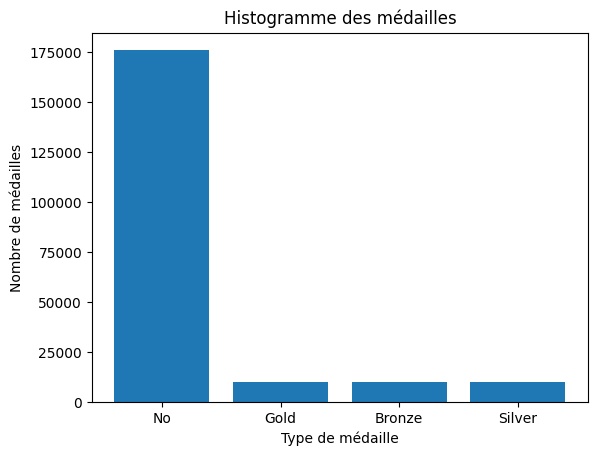

In [14]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

# Compter le nombre de chaque type de médaille
medal_counts = df2['Medal'].value_counts()

# Tracer l'histogramme
ax.bar(medal_counts.index.astype(str), medal_counts.values)

# Ajouter des étiquettes et un titre
ax.set_xlabel('Type de médaille')
ax.set_ylabel('Nombre de médailles')
ax.set_title('Histogramme des médailles')



Etude poids / taille des athlètes

Text(0.5, 1.0, 'Poids/taille')

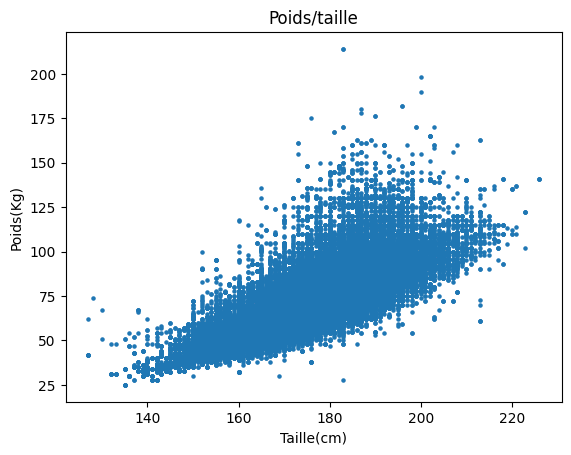

In [15]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
# Compter le nombre de chaque type de médaille
medal_counts = df2['Medal'].value_counts()
# Tracer l'histogramme
ax.scatter(df2['Height'],df2['Weight'], s = 5)

# Ajouter des étiquettes et un titre
ax.set_xlabel('Taille(cm)')
ax.set_ylabel('Poids(Kg)')
ax.set_title('Poids/taille')

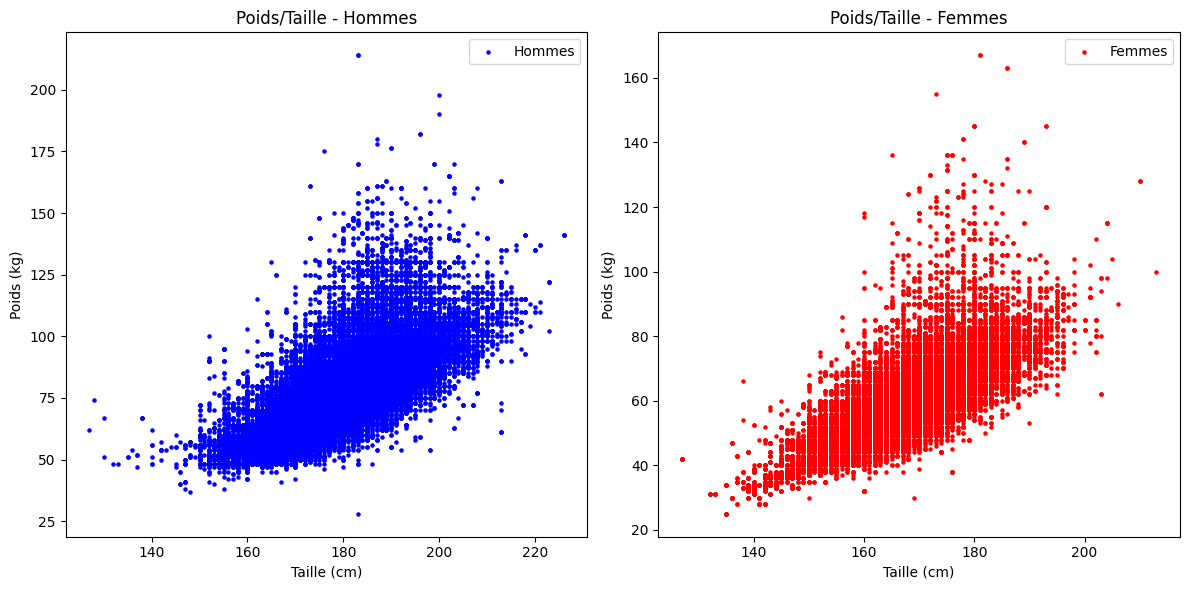

In [16]:
import matplotlib.pyplot as plt
# Créer une figure et des axes
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# Filtrer les données pour les hommes (M) et les femmes (F)
df_male = df2[df2['Sex'] == 'M']
df_female = df2[df2['Sex'] == 'F']
# Tracer le scatter plot pour les hommes
ax[0].scatter(df_male['Height'], df_male['Weight'], s=5, c='blue', label='Hommes')
ax[0].set_xlabel('Taille (cm)')
ax[0].set_ylabel('Poids (kg)')
ax[0].set_title('Poids/Taille - Hommes')

# Tracer le scatter plot pour les femmes
ax[1].scatter(df_female['Height'], df_female['Weight'], s=5, c='red', label='Femmes')
ax[1].set_xlabel('Taille (cm)')
ax[1].set_ylabel('Poids (kg)')
ax[1].set_title('Poids/Taille - Femmes')

# Afficher une légende
ax[0].legend()
ax[1].legend()

# Afficher la figure
plt.tight_layout()
plt.show()


In [17]:
import plotly.offline as pyo
import plotly.graph_objs as go

# Création de la trace 3D
trace = go.Scatter3d(
    x=df2['Age'],
    y=df2['Height'],
    z=df2['Weight'],
    mode='markers',
    marker=dict(
        size=2,
        color='blue',  # Vous pouvez changer la couleur si vous le souhaitez
        opacity=0.8
    )
)
# Création de la figure
fig = go.Figure(data=[trace])
# Définition du titre et des étiquettes des axes
fig.update_layout(
    title='Représentation en 3D de Age, Taille et Poids',
    scene=dict(
        xaxis=dict(title='Âge'),
        yaxis=dict(title='Taille (cm)'),
        zaxis=dict(title='Poids (kg)')
    )
)

# Affichage de la figure en tant que sortie HTML
pyo.plot(fig, filename='3d_plot.html')


'3d_plot.html'

Etude des maxima

In [18]:
max_age = df2['Age'].max()
min_age = df2['Age'].min()
print("Age de %.1f à %.1f ans" % (min_age, max_age))

max_poids = df2['Weight'].max()
min_poids = df2['Weight'].min()
print("Poids de %.1f à %.1f kg" % (min_poids, max_poids))

max_taille = df2['Height'].max()
min_taille = df2['Height'].min()
print("Poids de %.1f à %.1f cm" % (min_taille, max_taille))

Age de 11.0 à 71.0 ans
Poids de 25.0 à 214.0 kg
Poids de 127.0 à 226.0 cm


In [20]:
# Athlète le plus grand
athlete_plus_grand = df2[df2['Height'] == df2['Height'].max()]
sport_plus_grand = athlete_plus_grand['Sport'].values[0]
print("Sport de l'athlète le plus grand :", sport_plus_grand)
# Athlète le plus petit
athlete_plus_petit = df2[df2['Height'] == df2['Height'].min()]
sport_plus_petit = athlete_plus_petit['Sport'].values[0]
print("Sport de l'athlète le plus petit :", sport_plus_petit)
# Athlète le plus vieux
athlete_plus_vieux = df2[df2['Age'] == df2['Age'].max()]
sport_plus_vieux = athlete_plus_vieux['Sport'].values[0]
print("Sport de l'athlète le plus vieux :", sport_plus_vieux)
# Athlète le plus jeune
athlete_plus_jeune = df2[df2['Age'] == df2['Age'].min()]
sport_plus_jeune = athlete_plus_jeune['Sport'].values[0]
print("Sport de l'athlète le plus jeune :", sport_plus_jeune)
# Athlète le plus lourd
athlete_plus_lourd = df2[df2['Weight'] == df2['Weight'].max()]
sport_plus_lourd = athlete_plus_lourd['Sport'].values[0]
print("Sport de l'athlète le plus lourd :", sport_plus_lourd)

# Athlète le plus léger
athlete_plus_leger = df2[df2['Weight'] == df2['Weight'].min()]
sport_plus_leger = athlete_plus_leger['Sport'].values[0]
print("Sport de l'athlète le plus léger :", sport_plus_leger)




Sport de l'athlète le plus grand : Basketball
Sport de l'athlète le plus petit : Gymnastics
Sport de l'athlète le plus vieux : Equestrianism
Sport de l'athlète le plus jeune : Figure Skating
Sport de l'athlète le plus lourd : Judo
Sport de l'athlète le plus léger : Gymnastics


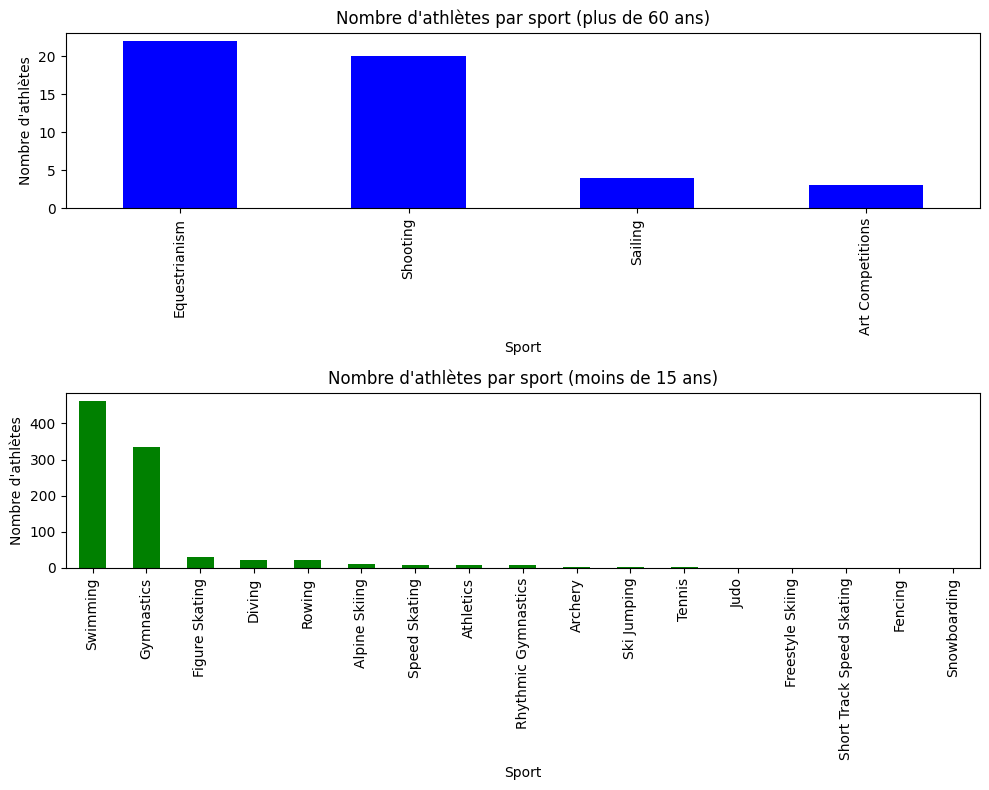

In [22]:
import matplotlib.pyplot as plt

# Filtre pour les athlètes de plus de 60 ans
athletes_plus_60 = df2[df2['Age'] > 60]
# Compter le nombre d'athlètes par sport
count_sports_plus_60 = athletes_plus_60['Sport'].value_counts()

# Filtre pour les athlètes de moins de 15 ans
athletes_moins_15 = df2[df2['Age'] < 15]
# Compter le nombre d'athlètes par sport
count_sports_moins_15 = athletes_moins_15['Sport'].value_counts()

# Création de la figure
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot pour les athlètes de plus de 60 ans
count_sports_plus_60.plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title("Nombre d'athlètes par sport (plus de 60 ans)")
axes[0].set_ylabel("Nombre d'athlètes")

# Plot pour les athlètes de moins de 15 ans
count_sports_moins_15.plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title("Nombre d'athlètes par sport (moins de 15 ans)")
axes[1].set_ylabel("Nombre d'athlètes")

# Réglage de l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le plot
plt.show()


In [23]:
# Compter le nombre d'occurrences de chaque nation et les trier par ordre croissant
nations_counts = df2['NOC'].value_counts().sort_values()

# Afficher les 3 nations les moins représentées
print("Les 3 nations les moins représentées :")
print(nations_counts.head(3))

Les 3 nations les moins représentées :
NOC
NFL    1
UAR    1
YMD    2
Name: count, dtype: int64


In [24]:
print(df1.loc[df1['NOC'] == "NFL", 'region'].values[0])
print(df1.loc[df1['NOC'] == "UAR", 'region'].values[0])
print(df1.loc[df1['NOC'] == "YMD", 'region'].values[0])

Canada
Syria
Yemen
